# Interpretting Regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools as itr
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
sns.set_theme(font_scale=2,palette='colorblind')

we'll return to the same data we used on Monday, first.

In [2]:
tips = sns.load_dataset("tips").dropna()

In [3]:
tips.shape

(244, 7)

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Again, we'll prepare the data.

In [5]:
# sklearn requires 2D object of features even for 1 feature
tips_X = tips['total_bill'].values
tips_X = tips_X[:,np.newaxis] # add an axis
tips_y = tips['tip']

tips_X_train,tips_X_test, tips_y_train, tips_y_test = train_test_split(
                     tips_X,
                     tips_y,
                     train_size=.8,
                     random_state=0)

Next, we'll fit the model

In [6]:
regr_tips = linear_model.LinearRegression()
regr_tips.fit(tips_X_train,tips_y_train)
regr_tips.score(tips_X_test,tips_y_test)

0.5906895098589039

This doesn't perform all that well, but let's investigate it further.
We'll start by looking at the residuals

In [7]:
tips_y_pred = regr_tips.predict(tips_X_test)

## Examining Residuals

The error, the difference between the predictions and the truth is called the
residual.

In [8]:
tips_y_pred - tips_y_test

64     0.092195
63    -0.960007
55    -0.593783
111    0.730731
225    0.104349
92     0.585451
76    -0.315843
181   -2.361866
188   -0.713567
180    0.704514
73    -1.523002
107   -0.819782
150   -0.108729
198    0.287638
224    0.748317
44    -1.627113
145    0.337270
110   -0.615508
243   -0.152549
189   -0.734142
210    1.939957
104   -1.025283
138    0.578198
8      0.525219
199    0.337033
203    0.116940
220    0.006281
125   -0.285225
5     -1.232034
22     0.325922
74     0.255195
124   -0.282726
12     0.952023
168    0.444221
45    -0.200007
158   -0.284589
37    -0.401728
136    0.029040
212   -3.290531
223   -0.423739
222   -0.060454
118    0.432432
231   -0.451826
155   -1.220382
209    0.034393
18    -0.827854
108   -0.964850
15    -0.801360
71    -0.318168
Name: tip, dtype: float64

To examine these, we can plot them on the data:

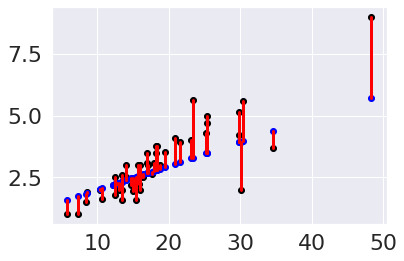

In [9]:
plt.scatter(tips_X_test,tips_y_test, color='black')
plt.scatter(tips_X_test,tips_y_pred, color='blue')

[plt.plot([x,x],[yp,yt], color='red', linewidth=3)
         for x, yp, yt in zip(tips_X_test, tips_y_pred,tips_y_test)];

We can plot them as a scatter plot as well.

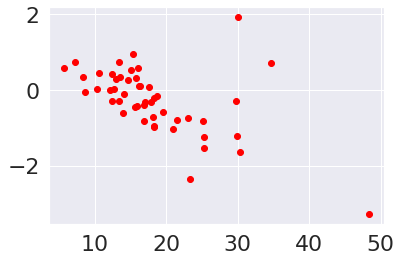

In [10]:
tips_residuals = tips_y_pred - tips_y_test
plt.scatter(tips_X_test,tips_residuals, color='red')

One thing we notice is that the residuals are smaller for some values of the
`total_bill`  and larger for others. This suggests that there is more
information left.
A good fit, would have residuals that are evenly distributed, not correlated
with the feature(s) in this case, the total bill.


## Polynomial regression

Polynomial regression is still a linear problem.  Linear regression solves for
the $\beta_i$ for a $d$ dimensional problem.

$$ y = \beta_0 + \beta_1 x_1 + \ldots + \beta_d x_d = \sum_i^d \beta_i x_i$$

Quadratic regression solves for

$$ y = \beta_0 + \sum_i^d \beta_i x_i$ + \sum_j^d \sum_i^d \beta_{d+i} x_i x_j + \sum_i^d x_i^2$ $$

This is still a linear problem, we can create a new $X$ matrix that has the
polynomial values of each feature  and solve for more $\beta$ values.

We use a transformer object, which works similarly to the estimators, but does
not use targets.
First, we instantiate.

In [11]:
poly = PolynomialFeatures(include_bias=False)

Then we apply it

In [12]:
tips_X2_train = poly.fit_transform(tips_X_train)
tips_X2_test = poly.fit_transform(tips_X_test)

We can see wht it did by looking at the shape.

In [13]:
tips_X_train.shape, tips_X2_train.shape

((195, 1), (195, 2))

In [14]:
tips_X2_train[:5,1]

array([ 722.5344, 1067.9824,  320.0521,  419.8401, 2320.3489])

In [15]:
tips_X_train[:5]

array([[26.88],
       [32.68],
       [17.89],
       [20.49],
       [48.17]])

In [16]:
tips_X2_train[:5,0]

array([26.88, 32.68, 17.89, 20.49, 48.17])

Now, we can fit a linear model on this data, which learns a weight for the data
and it's squared value.

In [17]:
regr2_tips = linear_model.LinearRegression()
regr2_tips.fit(tips_X2_train,tips_y_train)
tips2_y_pred = regr2_tips.predict(tips_X2_test)

Then we can plot it.

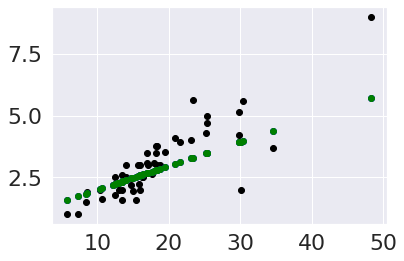

In [18]:
plt.scatter(tips_X_test,tips_y_test, color='black')
plt.scatter(tips_X_test,tips_y_pred, color='blue')
plt.scatter(tips_X_test,tips2_y_pred, color='green')

We can see that this its somewhat better, the residuals are more uniformly
distributed, but it doesn't look very nonlinear.  
We will examine this further in the next step, but first we will drop the linear column to see the quadratic more clearly.

In [19]:
poly = PolynomialFeatures()

tips_Xq_train = poly.fit_transform(tips_X_train)[:,::2]
tips_Xq_test = poly.fit_transform(tips_X_test)[:,::2]

regr_qu_tips = linear_model.LinearRegression(fit_intercept=False)
regr_qu_tips.fit(tips_Xq_train,tips_y_train)
tips2_q_pred = regr_qu_tips.predict(tips_Xq_test)

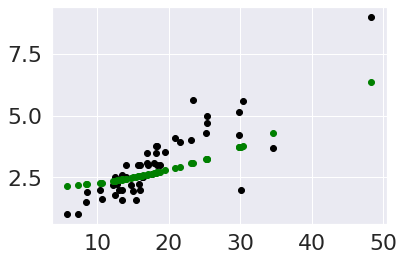

In [20]:
plt.scatter(tips_X_test,tips_y_test, color='black')
plt.scatter(tips_X_test,tips2_q_pred, color='green')

```{admonition} Try it Yourself
How would you make it cubic? what about 4th dimension?
```

## Examining Coefficients


Now we can compare the coefficients.
We saw above that the quadratic didn't help much, so let's look at those.

In [21]:
regr2_tips.coef_

array([ 9.70620903e-02, -4.18198822e-06])

The second parameter is very very small, so that explains why it didn't change
the fit much. We can use the features to figure out how important each
feature is to the prediction. Large numbers strongly influence the prediction
smaller ones influence it less.

In [22]:
regr_tips.coef_

array([0.0968534])

<!-- ## Multiple variables


```{admonition} Thinking Ahead
If this is not fully clear, it's okay.
Using multiple variables or nonlinear regression is an extension you can use for
your portfolio to earn level 3.  

```
We can also transform the other features to numerical features and then use that larger feature vector.

This binarizes the varialbes.
```{code-cell} ipython3
bin_cols = ['total_bill','sex','smoker','time']
tips_bin = tips[bin_cols].replace({'Female':1,'Male':0,
                                   'No':0,'Yes':1,
                                  'Dinner':1,'Lunch':0})
tips_bin.shape
```
This gets dummies for the other variables and concats this

```{code-cell} ipython3

tips_onehot = pd.concat([tips['total_bill'],
                         pd.get_dummies(tips['day']),
                        pd.get_dummies(tips['time'])],axis=1)

tips_onehot.head()
```

```{code-cell} ipython3
tips_onehot
```

```{code-cell} ipython3
col_names = (list(tips_onehot.columns) +
[a+'_'+b + '_' +c +'_'+d for a,b,c,d in itr.combinations(tips_onehot.columns,4)])
```

```{code-cell} ipython3
col_names[11:90]
```

```{code-cell} ipython3
sns.lmplot(data=tips,x='total_bill',y='tip',
          col='sex',row='smoker',hue='time')
```

```{code-cell} ipython3
interaction = PolynomialFeatures(interaction_only=True,
                                include_bias=False)
tips_interaction = interaction.fit_transform(tips_onehot,)
tips_all_X_train,tips_all_X_test, tips_all_y_train, tips_all_y_test = train_test_split(
                     tips_interaction,
                     tips_y,
                     train_size=.8,
                     random_state=0)
```

```{code-cell} ipython3
tips_all_X_train.shape
```

```{code-cell} ipython3
tips_all_X_train
```

```{code-cell} ipython3
regr_all_tips = linear_model.LinearRegression()
regr_all_tips.fit(tips_all_X_train,tips_all_y_train)
tips_all_y_pred = regr_all_tips.predict(tips_all_X_test,)
regr_all_tips.score(tips_all_X_test,tips_all_y_test)
```

```{code-cell} ipython3
plt.scatter(tips_X_test,tips_y_test, color='black')
plt.scatter(tips_X_test,tips_y_pred, color='blue')
plt.scatter(tips_X_test,tips_all_y_pred, color='green')
```

```{code-cell} ipython3
regr_all_tips.coef_
``` -->

## Sparse Regression

An extreme is for some coefficients to be zero.
The LASSO model, constrains some of the coefficients to be 0, so it learns
simultanesouly how to combine the features to predict the target and which
subset of the features to use.

```{admonition} Further Reading
For the mathermatical formulation see the sklearn [User Guide Section on LASSO](https://scikit-learn.org/stable/modules/linear_model.html#lasso)
and the code in [LASSO docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
```

```{admonition} Thinking Ahead
LASSO is not required for assignment 8, but is one way you could earn level 3.
Here is a preview, but you can investigate it further on your own.
```

In [23]:
tips_lasso = linear_model.Lasso(alpha=.0025)
tips_lasso.fit(tips_all_X_train,tips_all_y_train)
tips_lasso_y_pred = tips_lasso.predict(tips_all_X_test,)
tips_lasso.score(tips_all_X_test,tips_all_y_test)

NameError: name 'tips_all_X_train' is not defined

NameError: name 'tips_lasso_y_pred' is not defined

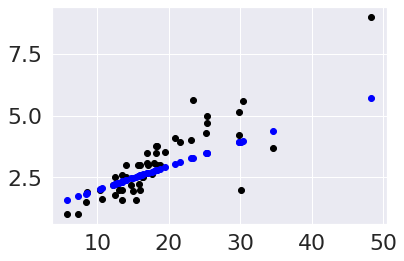

In [24]:
plt.scatter(tips_X_test,tips_y_test, color='black')
plt.scatter(tips_X_test,tips_y_pred, color='blue')
plt.scatter(tips_X_test,tips_lasso_y_pred, color='green')

In [25]:
sum(tips_lasso.coef_ ==0)/len(tips_lasso.coef_)

AttributeError: 'Lasso' object has no attribute 'coef_'

In [26]:
tips_onehot.shape, tips_interacion.shape

NameError: name 'tips_onehot' is not defined

The transform changed our data from 10 columns to 55.

In [27]:
tips_interacion.head

NameError: name 'tips_interacion' is not defined

<!-- work through dummies

+++

show lasso

```{code-cell} ipython3

``` -->

## Questions After Class


### When do we do regression?
```{toggle}
we do regresion, when we want to predict a continuous value
```


### What should I look for in datasets to know whether a linear model or non-linear model is best?
```{toggle}
If you know a reason to choose one from domain knowledge, always use that. From
data alone, a reasonable thing to do is to fit a linear model and then examine
the residuals and use a more complex model if that makes sense.
```

### How can we tell if a dataset is going to be useful through tweaking or is just not worth it?
```{toggle}
This is a **very** good question, but does not have a simple answer. In some
cases, a moderate fit quality is enough, because there's low risk of making
errors.  In other cases, a really high quality fit is required because of the
risk.
```